In [18]:
!pip install matplotlib

In [60]:
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

red = (0, 0, 255)

In [58]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [81]:
targetID = "MPIIFaceGaze/p02/"

In [82]:
screenSize = scipy.io.loadmat(targetID+'Calibration/screenSize.mat')
screenSize['height_pixel'][0][0]

800

In [90]:
monitorPose = scipy.io.loadmat(targetID+'Calibration/monitorPose.mat')
monitorPose

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Oct 14 14:11:04 2016',
 '__version__': '1.0',
 '__globals__': [],
 'rvects': array([[ 0.01111139],
        [ 3.10727115],
        [-0.03131543]]),
 'tvecs': array([[141.81929308],
        [-17.1923557 ],
        [ 24.65766573]])}

In [91]:
Camera = scipy.io.loadmat(targetID+'Calibration/Camera.mat')
Camera

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Oct 14 14:11:04 2016',
 '__version__': '1.0',
 '__globals__': [],
 'cameraMatrix': array([[990.89993616,   0.        , 650.26758626],
        [  0.        , 995.16806395, 356.09938093],
        [  0.        ,   0.        ,   1.        ]]),
 'distCoeffs': array([[-0.12433599,  0.38168479,  0.00215795,  0.0084089 , -0.3864675 ]]),
 'retval': array([[0.55372444]]),
 'rvecs': array([[-2.30176278e-02, -7.20186161e-01, -9.92698276e-02],
        [-1.65412337e-01,  5.30038929e-01, -1.04252558e-01],
        [-2.91932795e-01, -4.68579580e-01, -2.72546143e-01],
        [-3.01383841e-01, -8.77186193e-02, -2.02493280e-01],
        [-1.76030938e-01,  5.89189971e-01,  4.69164600e-02],
        [ 4.04928786e-01, -8.94608996e-03, -3.83798233e-02],
        [ 4.00868354e-01,  1.05244824e-01, -1.06489856e-01],
        [-2.99148238e-01,  4.55065352e-02,  4.93545636e-03],
        [ 4.60009696e-01,  3.74558650e-02, -1.09471428e-01],
    

In [83]:
metadata = targetID+targetID[-5:-1]+'.txt'

metalist = []
file = open(metadata, "r")
while True:
    line = file.readline()
    if not line:
        break
    metalist.append(line.strip())

file.close()

In [86]:
targetImage = 1
imglist = metalist[targetImage].split()

In [89]:
imglist

['day01/0021.jpg',
 '1109',
 '514',
 '510',
 '393',
 '565',
 '385',
 '641',
 '369',
 '698',
 '361',
 '583',
 '531',
 '669',
 '515',
 '-0.022267',
 '0.281062',
 '-0.171703',
 '-23.072096',
 '10.257598',
 '468.920655',
 '-19.287934',
 '32.782992',
 '467.873978',
 '-105.367829',
 '99.506231',
 '13.863704',
 'right']

(720, 1280, 3)


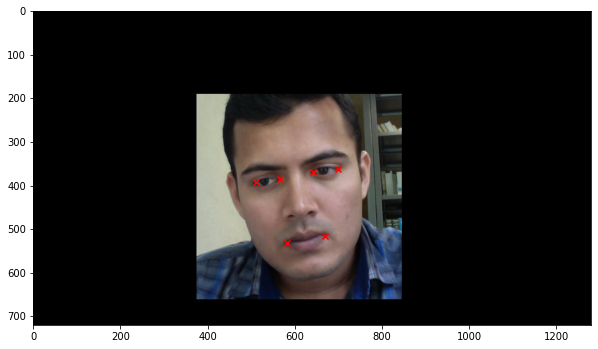

1109 514


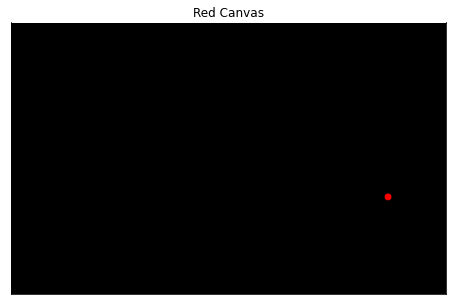

In [87]:
image = mpimg.imread(targetID+imglist[0])
print(image.shape)
landmarks = list(map(int, imglist[3:15]))
pts = np.array([[landmarks[0], landmarks[1]], [landmarks[2], landmarks[3]], [landmarks[4], landmarks[5]], [landmarks[6], landmarks[7]], [landmarks[8], landmarks[9]], [landmarks[10], landmarks[11]]])
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red")

plt.show()

white_canvas = np.zeros((screenSize['height_pixel'][0][0], screenSize['width_pixel'][0][0], 3), dtype="uint8") 

pointX= int(imglist[1])
pointY= int(imglist[2])
print(pointX, pointY)
cv2.circle(white_canvas, (pointX, pointY), 10, red, -1)
img_show("Red Canvas", [white_canvas])

In [88]:
white_canvas = np.zeros((screenSize['height_pixel'][0][0], screenSize['width_pixel'][0][0], 3), dtype="uint8") 
print(screenSize['width_pixel'][0][0], screenSize['height_pixel'][0][0])

1280 800


1148 290


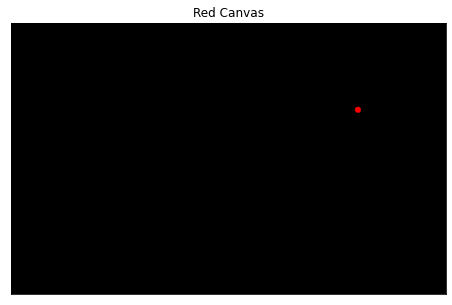

In [79]:
red = (0, 0, 255)
pointX= int(imglist[1])
pointY= int(imglist[2])
print(pointX, pointY)
cv2.circle(white_canvas, (pointX, pointY), 10, red, -1)
img_show("Red Canvas", [white_canvas])